# Project Luther Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pprint import pprint
import sklearn
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf



%matplotlib inline

/Users/KVASU/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from __future__ import print_function, division

In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:
import dateutil.parser

In [5]:
import os

### Read in data from saved csv

In [46]:
df = pd.read_csv("DataFrame_Using")
df

,Unnamed: 0,budget,domestic total gross,foreign total gross,rating,release date,runtime (mins),weeks,days,Title,Genre,Metascore,Rated,Released,imdbRating
0,0,NaN,74865517,NaN,R,1979-10-05,121,NaN,NaN,10,"Comedy, Romance",NaN,R,05 Oct 1979,6.0
1,1,$130 million,60522097,"$183,321,030",PG-13,2013-05-31,100,80 days / 11.4 weeks,80.0,After Earth,"Action, Adventure, Sci-Fi",33.0,PG-13,31 May 2013,4.9
2,2,$22 million,54240821,"$34,640,000",PG,2014-08-08,122,119 days / 17 weeks,119.0,The Hundred-Foot Journey,"Comedy, Drama",55.0,PG,08 Aug 2014,7.3
3,3,NaN,136189294,"$184,500,000",G,1996-11-27,103,NaN,NaN,101 Dalmatians,"Animation, Adventure, Comedy",NaN,G,25 Jan 1961,7.2
4,4,$85 million,66957026,"$116,654,745",G,2000-11-22,104,NaN,NaN,102 Dalmatians,"Adventure, Comedy, Family",35.0,G,22 Nov 2000,4.8
5,5,$30 million,38178166,"$15,300,000",PG-13,1999-03-31,97,NaN,NaN,10 Things I Hate About You,"Comedy, Drama, Romance",70.0,PG-13,31 Mar 1999,7.2
6,6,$37 million,57231747,"$39,223,950",PG-13,2004-04-23,97,NaN,NaN,13 Going on 30,"Comedy, Fantasy, Romance",57.0,PG-13,23 Apr 2004,6.1
7,7,NaN,36895141,"$28,769,580",PG-13,2006-03-03,105,84 days / 12 weeks,84.0,16 Blocks,"Action, Crime, Drama",63.0,PG-13,03 Mar 2006,6.6
8,8,NaN,64167069,"$72,100,407",PG-13,2009-04-17,102,112 days / 16 weeks,112.0,17 Again,"Comedy, Drama, Family",48.0,PG-13,17 Apr 2009,6.4
9,9,$190 million,93436322,"$115,718,000",PG,2015-05-22,130,119 days / 17 weeks,119.0,Tomorrowland,"Action, Adventure, Family",60.0,PG,22 May 2015,6.5


### Clean Data

In [47]:
# convert budget strings to numbers 
def budget_to_float(budgetstring):
    try:
        budget = float(budgetstring[budgetstring.index("$")+1:budgetstring.index("million")])
        return budget * 1000000
    except:
        return None



In [48]:
df['Budget_Int'] = df.budget.map(budget_to_float)
df

,Unnamed: 0,budget,domestic total gross,foreign total gross,rating,release date,runtime (mins),weeks,days,Title,Genre,Metascore,Rated,Released,imdbRating,Budget_Int
0,0,NaN,74865517,NaN,R,1979-10-05,121,NaN,NaN,10,"Comedy, Romance",NaN,R,05 Oct 1979,6.0,NaN
1,1,$130 million,60522097,"$183,321,030",PG-13,2013-05-31,100,80 days / 11.4 weeks,80.0,After Earth,"Action, Adventure, Sci-Fi",33.0,PG-13,31 May 2013,4.9,130000000.0
2,2,$22 million,54240821,"$34,640,000",PG,2014-08-08,122,119 days / 17 weeks,119.0,The Hundred-Foot Journey,"Comedy, Drama",55.0,PG,08 Aug 2014,7.3,22000000.0
3,3,NaN,136189294,"$184,500,000",G,1996-11-27,103,NaN,NaN,101 Dalmatians,"Animation, Adventure, Comedy",NaN,G,25 Jan 1961,7.2,NaN
4,4,$85 million,66957026,"$116,654,745",G,2000-11-22,104,NaN,NaN,102 Dalmatians,"Adventure, Comedy, Family",35.0,G,22 Nov 2000,4.8,85000000.0
5,5,$30 million,38178166,"$15,300,000",PG-13,1999-03-31,97,NaN,NaN,10 Things I Hate About You,"Comedy, Drama, Romance",70.0,PG-13,31 Mar 1999,7.2,30000000.0
6,6,$37 million,57231747,"$39,223,950",PG-13,2004-04-23,97,NaN,NaN,13 Going on 30,"Comedy, Fantasy, Romance",57.0,PG-13,23 Apr 2004,6.1,37000000.0
7,7,NaN,36895141,"$28,769,580",PG-13,2006-03-03,105,84 days / 12 weeks,84.0,16 Blocks,"Action, Crime, Drama",63.0,PG-13,03 Mar 2006,6.6,NaN
8,8,NaN,64167069,"$72,100,407",PG-13,2009-04-17,102,112 days / 16 weeks,112.0,17 Again,"Comedy, Drama, Family",48.0,PG-13,17 Apr 2009,6.4,NaN
9,9,$190 million,93436322,"$115,718,000",PG,2015-05-22,130,119 days / 17 weeks,119.0,Tomorrowland,"Action, Adventure, Family",60.0,PG,22 May 2015,6.5,190000000.0


In [49]:
#convert foreign total to number
def money_to_int(moneystring):
    try:
        moneystring = moneystring.replace('$', '').replace(',', '')
        moneystring = int(str(moneystring).replace('\xc2\xa0',''))
        return (moneystring)
    except:
        return None
    
print (money_to_int('$183,321,030'))
print (money_to_int('NaN'))

183321030
None


In [50]:
df['Foreign'] = df['foreign total gross']
df

,Unnamed: 0,budget,domestic total gross,foreign total gross,rating,release date,runtime (mins),weeks,days,Title,Genre,Metascore,Rated,Released,imdbRating,Budget_Int,Foreign
0,0,NaN,74865517,NaN,R,1979-10-05,121,NaN,NaN,10,"Comedy, Romance",NaN,R,05 Oct 1979,6.0,NaN,NaN
1,1,$130 million,60522097,"$183,321,030",PG-13,2013-05-31,100,80 days / 11.4 weeks,80.0,After Earth,"Action, Adventure, Sci-Fi",33.0,PG-13,31 May 2013,4.9,130000000.0,"$183,321,030"
2,2,$22 million,54240821,"$34,640,000",PG,2014-08-08,122,119 days / 17 weeks,119.0,The Hundred-Foot Journey,"Comedy, Drama",55.0,PG,08 Aug 2014,7.3,22000000.0,"$34,640,000"
3,3,NaN,136189294,"$184,500,000",G,1996-11-27,103,NaN,NaN,101 Dalmatians,"Animation, Adventure, Comedy",NaN,G,25 Jan 1961,7.2,NaN,"$184,500,000"
4,4,$85 million,66957026,"$116,654,745",G,2000-11-22,104,NaN,NaN,102 Dalmatians,"Adventure, Comedy, Family",35.0,G,22 Nov 2000,4.8,85000000.0,"$116,654,745"
5,5,$30 million,38178166,"$15,300,000",PG-13,1999-03-31,97,NaN,NaN,10 Things I Hate About You,"Comedy, Drama, Romance",70.0,PG-13,31 Mar 1999,7.2,30000000.0,"$15,300,000"
6,6,$37 million,57231747,"$39,223,950",PG-13,2004-04-23,97,NaN,NaN,13 Going on 30,"Comedy, Fantasy, Romance",57.0,PG-13,23 Apr 2004,6.1,37000000.0,"$39,223,950"
7,7,NaN,36895141,"$28,769,580",PG-13,2006-03-03,105,84 days / 12 weeks,84.0,16 Blocks,"Action, Crime, Drama",63.0,PG-13,03 Mar 2006,6.6,NaN,"$28,769,580"
8,8,NaN,64167069,"$72,100,407",PG-13,2009-04-17,102,112 days / 16 weeks,112.0,17 Again,"Comedy, Drama, Family",48.0,PG-13,17 Apr 2009,6.4,NaN,"$72,100,407"
9,9,$190 million,93436322,"$115,718,000",PG,2015-05-22,130,119 days / 17 weeks,119.0,Tomorrowland,"Action, Adventure, Family",60.0,PG,22 May 2015,6.5,190000000.0,"$115,718,000"


In [51]:
df['Foreign_Int'] = map(money_to_int,df['Foreign'])
df

,Unnamed: 0,budget,domestic total gross,foreign total gross,rating,release date,runtime (mins),weeks,days,Title,Genre,Metascore,Rated,Released,imdbRating,Budget_Int,Foreign,Foreign_Int
0,0,NaN,74865517,NaN,R,1979-10-05,121,NaN,NaN,10,"Comedy, Romance",NaN,R,05 Oct 1979,6.0,NaN,NaN,NaN
1,1,$130 million,60522097,"$183,321,030",PG-13,2013-05-31,100,80 days / 11.4 weeks,80.0,After Earth,"Action, Adventure, Sci-Fi",33.0,PG-13,31 May 2013,4.9,130000000.0,"$183,321,030",183321030.0
2,2,$22 million,54240821,"$34,640,000",PG,2014-08-08,122,119 days / 17 weeks,119.0,The Hundred-Foot Journey,"Comedy, Drama",55.0,PG,08 Aug 2014,7.3,22000000.0,"$34,640,000",34640000.0
3,3,NaN,136189294,"$184,500,000",G,1996-11-27,103,NaN,NaN,101 Dalmatians,"Animation, Adventure, Comedy",NaN,G,25 Jan 1961,7.2,NaN,"$184,500,000",184500000.0
4,4,$85 million,66957026,"$116,654,745",G,2000-11-22,104,NaN,NaN,102 Dalmatians,"Adventure, Comedy, Family",35.0,G,22 Nov 2000,4.8,85000000.0,"$116,654,745",116654745.0
5,5,$30 million,38178166,"$15,300,000",PG-13,1999-03-31,97,NaN,NaN,10 Things I Hate About You,"Comedy, Drama, Romance",70.0,PG-13,31 Mar 1999,7.2,30000000.0,"$15,300,000",15300000.0
6,6,$37 million,57231747,"$39,223,950",PG-13,2004-04-23,97,NaN,NaN,13 Going on 30,"Comedy, Fantasy, Romance",57.0,PG-13,23 Apr 2004,6.1,37000000.0,"$39,223,950",39223950.0
7,7,NaN,36895141,"$28,769,580",PG-13,2006-03-03,105,84 days / 12 weeks,84.0,16 Blocks,"Action, Crime, Drama",63.0,PG-13,03 Mar 2006,6.6,NaN,"$28,769,580",28769580.0
8,8,NaN,64167069,"$72,100,407",PG-13,2009-04-17,102,112 days / 16 weeks,112.0,17 Again,"Comedy, Drama, Family",48.0,PG-13,17 Apr 2009,6.4,NaN,"$72,100,407",72100407.0
9,9,$190 million,93436322,"$115,718,000",PG,2015-05-22,130,119 days / 17 weeks,119.0,Tomorrowland,"Action, Adventure, Family",60.0,PG,22 May 2015,6.5,190000000.0,"$115,718,000",115718000.0


In [52]:
#convert runtime to number
def convert_runtime(runtime):
    try:
        print (runtime)
        runtime = int(str(runtime).replace('\xc2\xa0',''))
        return (runtime)
    except:
        return None

In [53]:
df['Runtime_Int']=df['runtime (mins)']
df

,Unnamed: 0,budget,domestic total gross,foreign total gross,rating,release date,runtime (mins),weeks,days,Title,Genre,Metascore,Rated,Released,imdbRating,Budget_Int,Foreign,Foreign_Int,Runtime_Int
0,0,NaN,74865517,NaN,R,1979-10-05,121,NaN,NaN,10,"Comedy, Romance",NaN,R,05 Oct 1979,6.0,NaN,NaN,NaN,121
1,1,$130 million,60522097,"$183,321,030",PG-13,2013-05-31,100,80 days / 11.4 weeks,80.0,After Earth,"Action, Adventure, Sci-Fi",33.0,PG-13,31 May 2013,4.9,130000000.0,"$183,321,030",183321030.0,100
2,2,$22 million,54240821,"$34,640,000",PG,2014-08-08,122,119 days / 17 weeks,119.0,The Hundred-Foot Journey,"Comedy, Drama",55.0,PG,08 Aug 2014,7.3,22000000.0,"$34,640,000",34640000.0,122
3,3,NaN,136189294,"$184,500,000",G,1996-11-27,103,NaN,NaN,101 Dalmatians,"Animation, Adventure, Comedy",NaN,G,25 Jan 1961,7.2,NaN,"$184,500,000",184500000.0,103
4,4,$85 million,66957026,"$116,654,745",G,2000-11-22,104,NaN,NaN,102 Dalmatians,"Adventure, Comedy, Family",35.0,G,22 Nov 2000,4.8,85000000.0,"$116,654,745",116654745.0,104
5,5,$30 million,38178166,"$15,300,000",PG-13,1999-03-31,97,NaN,NaN,10 Things I Hate About You,"Comedy, Drama, Romance",70.0,PG-13,31 Mar 1999,7.2,30000000.0,"$15,300,000",15300000.0,97
6,6,$37 million,57231747,"$39,223,950",PG-13,2004-04-23,97,NaN,NaN,13 Going on 30,"Comedy, Fantasy, Romance",57.0,PG-13,23 Apr 2004,6.1,37000000.0,"$39,223,950",39223950.0,97
7,7,NaN,36895141,"$28,769,580",PG-13,2006-03-03,105,84 days / 12 weeks,84.0,16 Blocks,"Action, Crime, Drama",63.0,PG-13,03 Mar 2006,6.6,NaN,"$28,769,580",28769580.0,105
8,8,NaN,64167069,"$72,100,407",PG-13,2009-04-17,102,112 days / 16 weeks,112.0,17 Again,"Comedy, Drama, Family",48.0,PG-13,17 Apr 2009,6.4,NaN,"$72,100,407",72100407.0,102
9,9,$190 million,93436322,"$115,718,000",PG,2015-05-22,130,119 days / 17 weeks,119.0,Tomorrowland,"Action, Adventure, Family",60.0,PG,22 May 2015,6.5,190000000.0,"$115,718,000",115718000.0,130


In [54]:
df['Runtime_Int'] = map(convert_runtime,df['runtime (mins)'])
df

121
100
122
103
104
97
97
105
102
130
116
158
123
109
112
107
103
101
109
117
113
83
117
94
116
128
127
96
188
118
124
110
100
113
100
124
105
116
121
94
111
102
94
99
110
112
145
124
88
137
132
90
81
156
112
109
114
137
126
123
138
113
103
90
87
86
92
88
123
142
122
160
110
95
104
114
113
132
81
102
102
152
119
119
89
89
89
103
94
91
140
103
101
97
83
148
127
127
118
118
93
112
117
84
157
116
133
138
100
109
92
94
120
144
114
97
97
100
139
117
95
123
130
100
95
94
165
104
141
168
120
92
96
105
135
96
111
108
118
123
147
93
89
123
102
106
112
123
126
165
165
122
126
125
116
131
123
119
90
100
136
80
102
104
93
95
90
89
87
92
108
90
212
86
113
118
109
114
122
92
85
105
103
105
90
117
131
105
104
97
93
87
125
107
98
99
130
107
157
117
119
110
144
125
118
103
120
117
114
93
86
117
95
126
138
124
104
105
150
108
94
108
128
96
143
148
107
86
118
95
117
84
145
106
106
135
123
118
108
111
97
88
127
177
122
93
100
86
106
102
90
135
108
176
95
105
98
133
135
108
111
85
120
132
101
88
97
96
136


,Unnamed: 0,budget,domestic total gross,foreign total gross,rating,release date,runtime (mins),weeks,days,Title,Genre,Metascore,Rated,Released,imdbRating,Budget_Int,Foreign,Foreign_Int,Runtime_Int
0,0,NaN,74865517,NaN,R,1979-10-05,121,NaN,NaN,10,"Comedy, Romance",NaN,R,05 Oct 1979,6.0,NaN,NaN,NaN,121
1,1,$130 million,60522097,"$183,321,030",PG-13,2013-05-31,100,80 days / 11.4 weeks,80.0,After Earth,"Action, Adventure, Sci-Fi",33.0,PG-13,31 May 2013,4.9,130000000.0,"$183,321,030",183321030.0,100
2,2,$22 million,54240821,"$34,640,000",PG,2014-08-08,122,119 days / 17 weeks,119.0,The Hundred-Foot Journey,"Comedy, Drama",55.0,PG,08 Aug 2014,7.3,22000000.0,"$34,640,000",34640000.0,122
3,3,NaN,136189294,"$184,500,000",G,1996-11-27,103,NaN,NaN,101 Dalmatians,"Animation, Adventure, Comedy",NaN,G,25 Jan 1961,7.2,NaN,"$184,500,000",184500000.0,103
4,4,$85 million,66957026,"$116,654,745",G,2000-11-22,104,NaN,NaN,102 Dalmatians,"Adventure, Comedy, Family",35.0,G,22 Nov 2000,4.8,85000000.0,"$116,654,745",116654745.0,104
5,5,$30 million,38178166,"$15,300,000",PG-13,1999-03-31,97,NaN,NaN,10 Things I Hate About You,"Comedy, Drama, Romance",70.0,PG-13,31 Mar 1999,7.2,30000000.0,"$15,300,000",15300000.0,97
6,6,$37 million,57231747,"$39,223,950",PG-13,2004-04-23,97,NaN,NaN,13 Going on 30,"Comedy, Fantasy, Romance",57.0,PG-13,23 Apr 2004,6.1,37000000.0,"$39,223,950",39223950.0,97
7,7,NaN,36895141,"$28,769,580",PG-13,2006-03-03,105,84 days / 12 weeks,84.0,16 Blocks,"Action, Crime, Drama",63.0,PG-13,03 Mar 2006,6.6,NaN,"$28,769,580",28769580.0,105
8,8,NaN,64167069,"$72,100,407",PG-13,2009-04-17,102,112 days / 16 weeks,112.0,17 Again,"Comedy, Drama, Family",48.0,PG-13,17 Apr 2009,6.4,NaN,"$72,100,407",72100407.0,102
9,9,$190 million,93436322,"$115,718,000",PG,2015-05-22,130,119 days / 17 weeks,119.0,Tomorrowland,"Action, Adventure, Family",60.0,PG,22 May 2015,6.5,190000000.0,"$115,718,000",115718000.0,130


In [62]:
# del df['Unnamed: 0']
# del df['budget']
# del df['runtime (mins)']
# del df['Foreign']
df

,domestic total gross,foreign total gross,rating,release date,weeks,days,Title,Genre,Metascore,Rated,Released,imdbRating,Budget_Int,Foreign_Int,Runtime_Int
0,74865517,NaN,R,1979-10-05,NaN,NaN,10,"Comedy, Romance",NaN,R,05 Oct 1979,6.0,NaN,NaN,121
1,60522097,"$183,321,030",PG-13,2013-05-31,80 days / 11.4 weeks,80.0,After Earth,"Action, Adventure, Sci-Fi",33.0,PG-13,31 May 2013,4.9,130000000.0,183321030.0,100
2,54240821,"$34,640,000",PG,2014-08-08,119 days / 17 weeks,119.0,The Hundred-Foot Journey,"Comedy, Drama",55.0,PG,08 Aug 2014,7.3,22000000.0,34640000.0,122
3,136189294,"$184,500,000",G,1996-11-27,NaN,NaN,101 Dalmatians,"Animation, Adventure, Comedy",NaN,G,25 Jan 1961,7.2,NaN,184500000.0,103
4,66957026,"$116,654,745",G,2000-11-22,NaN,NaN,102 Dalmatians,"Adventure, Comedy, Family",35.0,G,22 Nov 2000,4.8,85000000.0,116654745.0,104
5,38178166,"$15,300,000",PG-13,1999-03-31,NaN,NaN,10 Things I Hate About You,"Comedy, Drama, Romance",70.0,PG-13,31 Mar 1999,7.2,30000000.0,15300000.0,97
6,57231747,"$39,223,950",PG-13,2004-04-23,NaN,NaN,13 Going on 30,"Comedy, Fantasy, Romance",57.0,PG-13,23 Apr 2004,6.1,37000000.0,39223950.0,97
7,36895141,"$28,769,580",PG-13,2006-03-03,84 days / 12 weeks,84.0,16 Blocks,"Action, Crime, Drama",63.0,PG-13,03 Mar 2006,6.6,NaN,28769580.0,105
8,64167069,"$72,100,407",PG-13,2009-04-17,112 days / 16 weeks,112.0,17 Again,"Comedy, Drama, Family",48.0,PG-13,17 Apr 2009,6.4,NaN,72100407.0,102
9,93436322,"$115,718,000",PG,2015-05-22,119 days / 17 weeks,119.0,Tomorrowland,"Action, Adventure, Family",60.0,PG,22 May 2015,6.5,190000000.0,115718000.0,130


In [64]:
df_dummied = pd.get_dummies(df['rating'],dummy_na=False)
df_dummied






,G,GP,M,PG,PG-13,R,Unrated
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [74]:
df = df.join(df_dummied)

In [76]:
# del df['rating']
# del df['Rated']
# del df['weeks']
# del df['foreign total gross']
df

,domestic total gross,release date,days,Title,Genre,Metascore,Released,imdbRating,Budget_Int,Foreign_Int,Runtime_Int,G,GP,M,PG,PG-13,R,Unrated
0,74865517,1979-10-05,NaN,10,"Comedy, Romance",NaN,05 Oct 1979,6.0,NaN,NaN,121,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60522097,2013-05-31,80.0,After Earth,"Action, Adventure, Sci-Fi",33.0,31 May 2013,4.9,130000000.0,183321030.0,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,54240821,2014-08-08,119.0,The Hundred-Foot Journey,"Comedy, Drama",55.0,08 Aug 2014,7.3,22000000.0,34640000.0,122,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,136189294,1996-11-27,NaN,101 Dalmatians,"Animation, Adventure, Comedy",NaN,25 Jan 1961,7.2,NaN,184500000.0,103,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,66957026,2000-11-22,NaN,102 Dalmatians,"Adventure, Comedy, Family",35.0,22 Nov 2000,4.8,85000000.0,116654745.0,104,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,38178166,1999-03-31,NaN,10 Things I Hate About You,"Comedy, Drama, Romance",70.0,31 Mar 1999,7.2,30000000.0,15300000.0,97,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,57231747,2004-04-23,NaN,13 Going on 30,"Comedy, Fantasy, Romance",57.0,23 Apr 2004,6.1,37000000.0,39223950.0,97,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,36895141,2006-03-03,84.0,16 Blocks,"Action, Crime, Drama",63.0,03 Mar 2006,6.6,NaN,28769580.0,105,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,64167069,2009-04-17,112.0,17 Again,"Comedy, Drama, Family",48.0,17 Apr 2009,6.4,NaN,72100407.0,102,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,93436322,2015-05-22,119.0,Tomorrowland,"Action, Adventure, Family",60.0,22 May 2015,6.5,190000000.0,115718000.0,130,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [185]:
list_of_genres['Genre'].head()

0                 Comedy, Romance
1       Action, Adventure, Sci-Fi
2                   Comedy, Drama
3    Animation, Adventure, Comedy
4       Adventure, Comedy, Family
Name: Genre, dtype: object

In [209]:
def build_genre_indicators(row):
    try:
        movie_genres = row["Genre"].lower().split(',')
        movie_genres = [g.strip() for g in movie_genres]
        for genre in ["comedy", "romance", "action", "drama", "family","thriller","short","sci-fi"]:
            if genre in movie_genres:
                row[genre] = 1
            else:
                row[genre] = 0
        return row
    except:
        return None

In [210]:
list_new_genre_frame = list_of_genres.apply(build_genre_indicators, axis=1)

In [211]:
list_new_genre_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 9 columns):
Genre       1877 non-null object
comedy      1877 non-null float64
romance     1877 non-null float64
action      1877 non-null float64
drama       1877 non-null float64
family      1877 non-null float64
thriller    1877 non-null float64
short       1877 non-null float64
sci-fi      1877 non-null float64
dtypes: float64(8), object(1)
memory usage: 132.2+ KB


In [215]:
list_new_genre_frame

,comedy,romance,action,drama,family,thriller,short,sci-fi
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [222]:
df = df.join(list_new_genre_frame)

In [223]:
df

,domestic total gross,release date,days,Title,Genre,Metascore,Released,imdbRating,Budget_Int,Foreign_Int,...,R,Unrated,comedy,romance,action,drama,family,thriller,short,sci-fi
0,74865517,1979-10-05,NaN,10,"Comedy, Romance",NaN,05 Oct 1979,6.0,NaN,NaN,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60522097,2013-05-31,80.0,After Earth,"Action, Adventure, Sci-Fi",33.0,31 May 2013,4.9,130000000.0,183321030.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,54240821,2014-08-08,119.0,The Hundred-Foot Journey,"Comedy, Drama",55.0,08 Aug 2014,7.3,22000000.0,34640000.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,136189294,1996-11-27,NaN,101 Dalmatians,"Animation, Adventure, Comedy",NaN,25 Jan 1961,7.2,NaN,184500000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,66957026,2000-11-22,NaN,102 Dalmatians,"Adventure, Comedy, Family",35.0,22 Nov 2000,4.8,85000000.0,116654745.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,38178166,1999-03-31,NaN,10 Things I Hate About You,"Comedy, Drama, Romance",70.0,31 Mar 1999,7.2,30000000.0,15300000.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,57231747,2004-04-23,NaN,13 Going on 30,"Comedy, Fantasy, Romance",57.0,23 Apr 2004,6.1,37000000.0,39223950.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,36895141,2006-03-03,84.0,16 Blocks,"Action, Crime, Drama",63.0,03 Mar 2006,6.6,NaN,28769580.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,64167069,2009-04-17,112.0,17 Again,"Comedy, Drama, Family",48.0,17 Apr 2009,6.4,NaN,72100407.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,93436322,2015-05-22,119.0,Tomorrowland,"Action, Adventure, Family",60.0,22 May 2015,6.5,190000000.0,115718000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Separate Features I Want To Analyze

In [264]:
df3 = df[['domestic total gross'
          ,'days'
          ,'Title'
          ,'Metascore'
          ,'imdbRating'
          ,'Budget_Int'
          ,'Foreign_Int'
          ,'Runtime_Int'
          ,'G'
          ,'PG'
          ,'PG-13'
          ,'R'
          ,'action'
          ,'comedy'
          ,'drama'
          ]]



df3 = df3[np.isfinite(df3['days'])]
df3 = df3[np.isfinite(df3['Budget_Int'])]
df3 = df3[np.isfinite(df3['Metascore'])]
df3 = df3[np.isfinite(df3['Foreign_Int'])]
df3 = df3.reset_index()



,index,domestic total gross,days,Title,Metascore,imdbRating,Budget_Int,Foreign_Int,Runtime_Int,G,PG,PG-13,R,action,comedy,drama
0,1,60522097,80.0,After Earth,33.0,4.9,130000000.0,183321030.0,100,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,54240821,119.0,The Hundred-Foot Journey,55.0,7.3,22000000.0,34640000.0,122,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,9,93436322,119.0,Tomorrowland,60.0,6.5,190000000.0,115718000.0,130,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,11,166112167,101.0,2012,49.0,5.8,200000000.0,603567306.0,158,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,12,81159365,56.0,21,48.0,6.8,35000000.0,76767975.0,123,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,13,138447667,108.0,21 Jump Street,69.0,7.2,42000000.0,63137661.0,109,0.0,0.0,0.0,1.0,1.0,1.0,0.0
6,14,191719337,157.0,22 Jump Street,71.0,7.1,50000000.0,139614539.0,112,0.0,0.0,0.0,1.0,1.0,1.0,0.0
7,15,76808654,133.0,27 Dresses,47.0,6.1,30000000.0,83450665.0,107,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,17,127154901,133.0,2 Fast 2 Furious,38.0,5.9,76000000.0,109195760.0,101,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,18,75612460,84.0,2 Guns,55.0,6.7,61000000.0,56327951.0,109,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [266]:
df3

,domestic total gross,days,Title,Metascore,imdbRating,Budget_Int,Foreign_Int,Runtime_Int,G,PG,PG-13,R,action,comedy,drama
0,60522097,80.0,After Earth,33.0,4.9,130000000.0,183321030.0,100,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,54240821,119.0,The Hundred-Foot Journey,55.0,7.3,22000000.0,34640000.0,122,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,93436322,119.0,Tomorrowland,60.0,6.5,190000000.0,115718000.0,130,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,166112167,101.0,2012,49.0,5.8,200000000.0,603567306.0,158,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,81159365,56.0,21,48.0,6.8,35000000.0,76767975.0,123,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,138447667,108.0,21 Jump Street,69.0,7.2,42000000.0,63137661.0,109,0.0,0.0,0.0,1.0,1.0,1.0,0.0
6,191719337,157.0,22 Jump Street,71.0,7.1,50000000.0,139614539.0,112,0.0,0.0,0.0,1.0,1.0,1.0,0.0
7,76808654,133.0,27 Dresses,47.0,6.1,30000000.0,83450665.0,107,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,127154901,133.0,2 Fast 2 Furious,38.0,5.9,76000000.0,109195760.0,101,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,75612460,84.0,2 Guns,55.0,6.7,61000000.0,56327951.0,109,0.0,0.0,0.0,1.0,1.0,1.0,0.0


### Store as csv

In [267]:
df3.to_csv('Movie_Analysis.csv', encoding='ascii')


In [269]:
dataframe1 = pd.read_csv('Movie_Analysis.csv')
df3 = dataframe1

### Actual Analysis (More in next notebook)

In [270]:
x1 = df3['domestic total gross']
x2 = df3['Metascore']
x3 = df3['imdbRating']
x4 = df3['Budget_Int']
x5 = df3['Foreign_Int']
x6 = df3['Runtime_Int']
x7 = df3['G']
x8 = df3['PG']
x9 = df3['PG-13']
x10 = df3['R']
x11 = df3['action']
x12 = df3['comedy']
x13 = df3['drama']

y = df3['days']

# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 + x13', data=df3, return_type="dataframe")
#took out 
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     30.54
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           1.36e-57
Time:                        16:21:42   Log-Likelihood:                -3991.5
No. Observations:                 797   AIC:                             8009.
Df Residuals:                     784   BIC:                             8070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7327     10.305      0.071      0.943       -19.495    20.961
x1          1.295e-07   2.77e-08      4.683      0.000      7.52e-08  1.84e-07
x2             0.3867      0.122      3.163      0.002         0.147     0.627
x3             9.9936      2.267      4.408      0.000         5.543    14.444
x4         -1.841e-07    3.9e-08     -4.722      0.000     -2.61e-07 -1.08e-07
x5          3.557e-08   1.65e-08      2.149      0.032      3.08e-09  6.81e-08
x6             0.1765      0.091      1.947      0.052        -0.001     0.354
x7            17.9067      6.422      2.788      0.005         5.301    30.512
x8            13.0350      3.790      3.440      0.001         5.596    20.474
x9           -10.1581      3.695     -2.749      0.006       -17.411    -2.905
x10          -20.0509      4.290     -4.674      0.000       -28.472   -11.629
x11            6.9222      3.458      2.002      0.046         0.135    13.709
x12           13.0542      3.241      4.028      0.000         6.692    19.416
x13            6.4074      3.464      1.850      0.065        -0.392    13.207
==============================================================================
Omnibus:                      324.282   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2698.101
Skew:                           1.619   Prob(JB):                         0.00
Kurtosis:                      11.412   Cond. No.                     5.93e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# What do I need for Today

Plot of predicted value and residuals.

y-predict versus y-actual

y    36.989734
dtype: float64


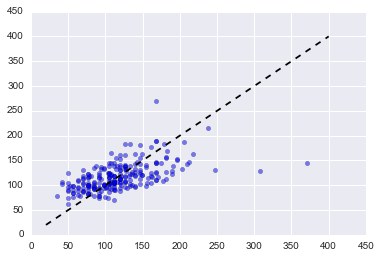

In [271]:
X = pd.concat([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13],axis=1).reset_index()
y = y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict(X_test)
RMSE_lr = np.sqrt(np.sum((pred_vals_lr - y_test)**2)/len(y_test))
print (RMSE_lr)

temp = np.linspace(20,400,400)



plt.scatter(y_test,pred_vals_lr,alpha=.5)
plt.plot(temp,temp,'k--')